In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import requests
import io
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.metrics import log_loss, auc, roc_auc_score, roc_curve, average_precision_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import plot_roc_curve
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import validation_curve

from mlrose_hiive import NNGSRunner
import mlrose_hiive

import missingno
import sklearn

from xgboost import XGBClassifier
from xgboost import plot_tree

from imblearn.over_sampling import SMOTE
import scikitplot as skplt

import seaborn as sns
import matplotlib.pyplot as plt

# File located in google drive
url = "https://drive.google.com/uc?export=download&id=1p5qOHBkiRing9gEd341mz9LVvEGtlbpL"

file = requests.get(url).content
df = pd.read_csv(io.StringIO(file.decode('utf-8')))

df = df.sample(frac=0.2, random_state = 117, axis = 0)

In [2]:
# Prepare variables by dropping id & target for X, and just add the target to Y 
#X = df.drop(['city', 'city_development_index'], axis = 1)
X = df.drop(['enrollee_id','target'], axis = 1)
Y = df['target']

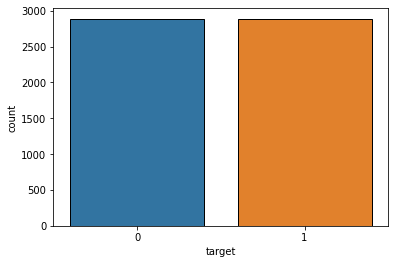

In [3]:
smote = SMOTE(random_state = 402)
X, Y = smote.fit_resample(X,Y)

sns.countplot(Y, edgecolor = 'black')

In [4]:
# Separate the data in Train & Test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42, shuffle = True, test_size = 0.2)
X_train.head()

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city,city_development_index,relevent_experience,training_hours
4192,1,0,2,0,21,4,0,3,49,0.920,1,27
387,1,1,2,0,5,2,2,1,64,0.624,0,122
4376,1,2,1,0,7,1,0,2,101,0.754,0,57
2384,1,0,3,0,9,4,0,5,112,0.923,1,6
2341,1,0,3,1,5,2,0,5,5,0.920,1,28


In [5]:
columns = X.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = columns)

X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns = columns)
X_test.head()

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city,city_development_index,relevent_experience,training_hours
0,-0.138739,-0.513591,-0.048197,-0.315083,0.775391,0.521452,-0.512388,-0.505004,0.540767,-1.420591,0.735754,-0.875414
1,-0.138739,-0.513591,-0.048197,-0.315083,1.863764,0.521452,-0.512388,1.417447,-1.138980,0.895600,0.735754,-0.790533
2,-0.138739,-0.513591,-0.048197,-0.315083,-0.002017,1.734328,-0.512388,0.776630,0.540767,-1.420591,0.735754,1.348453
3,-0.138739,-0.513591,-0.048197,-0.315083,1.863764,0.521452,-0.512388,0.776630,-1.254824,0.624917,0.735754,-0.909366
4,-0.138739,1.452339,-0.048197,-0.315083,0.464428,1.127890,-0.512388,1.417447,-0.704563,-0.540438,0.735754,0.448721


In [6]:
Y_train.value_counts(normalize=True)

1    0.506926
0    0.493074
Name: target, dtype: float64

In [7]:
Y_test.value_counts(normalize=True)

0    0.527682
1    0.472318
Name: target, dtype: float64

In [58]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner

# switch off the chatter
logging.basicConfig(level=logging.WARNING)


grid_search_parameters = {
    'max_iters': [1000],                          # nn params
    'learning_rate': [.01, .1],                       # nn params
    'activation': [mlrose_hiive.relu],            # nn params
    'restarts': [5],                             # rhc params
    'hidden_layer_sizes': [(10,7,5)]
}

nnr = NNGSRunner(
    #x_train=X_train_scaled,
    x_train = X_train,
    #y_train=y_train_hot,
    y_train = Y_train,
    #x_test=X_test_scaled,
    x_test = X_test,
    #y_test=y_test_hot,
    y_test = Y_test,
    experiment_name='nn_test_rhc',
    algorithm=mlrose_hiive.algorithms.rhc.random_hill_climb,
    grid_search_parameters=grid_search_parameters,
    iteration_list=[1, 10, 50, 100, 250, 500, 1000],
   # hidden_layer_sizes=[[10,7,5]],
    bias=True,
    early_stopping=True,
    clip_max=5,
    max_attempts=500,
    n_jobs=5,
    cv = 5,
    seed=123456,
    output_directory="ResultsNN/"
)

In [59]:
%%time
run_stats_df, curves_df, cv_results_df, grid_search_cv = nnr.run()

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: user 2min 33s, sys: 1min 21s, total: 3min 55s
Wall time: 26min 49s


In [10]:
%%time
y_test_pred = grid_search_cv.predict(X_test)
y_test_roc = roc_auc_score(Y_test, y_test_pred)
print(y_test_roc)

0.7097610040232992
CPU times: user 4.86 ms, sys: 417 µs, total: 5.28 ms
Wall time: 4.39 ms


In [11]:
%%time
y_train_pred = grid_search_cv.predict(X_train)
y_train_roc = roc_auc_score(Y_train, y_train_pred)
print(y_train_roc)

0.7016289927266266
CPU times: user 15.6 ms, sys: 1.84 ms, total: 17.5 ms
Wall time: 6.15 ms


In [12]:
HTML(run_stats_df[['current_restart', 'Iteration', 'Fitness', 'FEvals', 'Time', 'learning_rate']][0:14].to_html())

,current_restart,Iteration,Fitness,FEvals,Time,learning_rate
0,0,0,0.880696,1,0.013750,0.01
1,0,1,0.880440,3,0.281576,0.01
2,0,10,0.879157,15,0.482783,0.01
3,0,50,0.795895,75,0.900763,0.01
4,0,100,0.774541,150,1.419703,0.01
5,0,250,0.693105,375,2.648410,0.01
6,0,500,0.640459,749,4.781385,0.01
7,0,1000,0.600905,1447,8.787860,0.01
8,1,0,0.880696,1447,9.218042,0.01
9,1,1,0.880674,1449,9.585049,0.01


In [13]:
HTML(curves_df[['current_restart', 'Iteration', 'Fitness', 'FEvals', 'Time', 'learning_rate']][0:20].to_html())

,current_restart,Iteration,Fitness,FEvals,Time,learning_rate
0,0,0,0.880440,1.0,0.013750,0.01
1,0,1,0.880440,3.0,0.281576,0.01
2,0,2,0.880440,4.0,0.431900,0.01
3,0,3,0.879884,6.0,0.441113,0.01
4,0,4,0.879884,7.0,0.446936,0.01
5,0,5,0.879884,8.0,0.451352,0.01
6,0,6,0.879884,9.0,0.455702,0.01
7,0,7,0.879884,10.0,0.459968,0.01
8,0,8,0.879572,12.0,0.468403,0.01
9,0,9,0.879572,13.0,0.472663,0.01


In [14]:
HTML(cv_results_df[['mean_test_score', 'rank_test_score', 'mean_train_score', 'param_activation', 'param_hidden_layer_sizes', 'param_learning_rate',
                    'param_max_iters', 'param_restarts']].to_html())

,mean_test_score,rank_test_score,mean_train_score,param_activation,param_hidden_layer_sizes,param_learning_rate,param_max_iters,param_restarts
0,0.500000,7,0.500000,relu,"(1, 2)",0.01,1000,5
1,0.500000,7,0.500000,relu,"(1, 2)",0.10,1000,5
2,0.667573,3,0.670101,relu,"(7, 1)",0.01,1000,5
3,0.667573,3,0.670101,relu,"(7, 1)",0.10,1000,5
4,0.693243,1,0.697614,relu,"(10, 7, 5)",0.01,1000,5
5,0.693243,1,0.697614,relu,"(10, 7, 5)",0.10,1000,5
6,0.659013,5,0.658983,relu,"(5, 10, 5)",0.01,1000,5
7,0.659013,5,0.658983,relu,"(5, 10, 5)",0.10,1000,5
8,0.500000,7,0.500000,relu,"(15, 10, 2)",0.01,1000,5
9,0.500000,7,0.500000,relu,"(15, 10, 2)",0.10,1000,5


## simulated_annealing

nnann = NNGSRunner(
    #x_train=X_train_scaled,
    x_train = X_train,
    #y_train=y_train_hot,
    y_train = Y_train,
    #x_test=X_test_scaled,
    x_test = X_test,
    #y_test=y_test_hot,    
    y_test = Y_test,        
    experiment_name='nn_test_ann',
    algorithm=mlrose_hiive.algorithms.sa.simulated_annealing,
    grid_search_parameters=grid_search_parameters_ann,
    iteration_list=[1, 10, 50, 100, 250, 500, 1000],
    bias=True,
    early_stopping=False,
    clip_max=5,
    max_attempts=10000,
    generate_curves=True,
    seed=123456,
    output_directory="ResultsNN/"
)

In [144]:
##### from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner

# switch off the chatter
logging.basicConfig(level=logging.WARNING)


grid_search_parameters_ann = {
    'max_iters': [10000],                     # nn params
    'learning_rate': [0.001, 10, 50],                         # nn params
    'activation': [mlrose_hiive.relu], 
    'temperature_list' :[10, 50, 75, 100, 500],   
    'hidden_layer_sizes': [(10,7,5)],
    'schedule': [mlrose_hiive.GeomDecay(0.1), mlrose_hiive.GeomDecay(1), mlrose_hiive.GeomDecay(10)]
}

nnr_ann = NNGSRunner(
    #x_train=X_train_scaled,
    x_train = X_train,
    #y_train=y_train_hot,
    y_train = Y_train,
    #x_test=X_test_scaled,
    x_test = X_test,
    #y_test=y_test_hot,
    y_test = Y_test,
    experiment_name='nn_test_ann',
    algorithm=mlrose_hiive.algorithms.sa.simulated_annealing,
    grid_search_parameters=grid_search_parameters_ann,
    iteration_list=[1, 10, 50, 100, 250, 500],
   # hidden_layer_sizes=[[10,7,5]],
    bias=True,
    early_stopping=False,
    clip_max=5,
    max_attempts=10000,
    n_jobs=5,
    cv = 5,
    seed=123456,
    generate_curves=True,
    output_directory="ResultsNN/"
)

In [145]:
%%time
run_stats_df, curves_df, cv_results_df, grid_search_cv = nnr_ann.run()

Fitting 5 folds for each of 45 candidates, totalling 225 fits
CPU times: user 1min 53s, sys: 827 ms, total: 1min 54s
Wall time: 1h 40min 49s


In [146]:
%%time
y_test_pred = grid_search_cv.predict(X_test)
y_test_roc = roc_auc_score(Y_test, y_test_pred)
print(y_test_roc)

0.5
CPU times: user 4.5 ms, sys: 143 µs, total: 4.65 ms
Wall time: 3.72 ms


In [147]:
%%time
y_train_pred = grid_search_cv.predict(X_train)
y_train_roc = roc_auc_score(Y_train, y_train_pred)
print(y_train_roc)

0.5
CPU times: user 13.2 ms, sys: 4.37 ms, total: 17.6 ms
Wall time: 5.07 ms


In [148]:
HTML(run_stats_df[['Iteration', 'Fitness', 'FEvals', 'Time', 'learning_rate']][0:14].to_html())

KeyError: "None of [Index(['Iteration', 'Fitness', 'FEvals', 'Time', 'learning_rate'], dtype='object')] are in the [columns]"

In [ ]:
HTML(curves_df[['current_restart', 'Iteration', 'Fitness', 'FEvals', 'Time', 'learning_rate']][0:20].to_html())

In [ ]:
HTML(cv_results_df[['mean_test_score', 'rank_test_score', 'mean_train_score', 'param_activation', 'param_hidden_layer_sizes', 'param_learning_rate',
                    'param_max_iters', 'param_restarts']].to_html())

## genetic algorithm

In [152]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner

# switch off the chatter
logging.basicConfig(level=logging.WARNING)


grid_search_parameters = {
    'max_iters': [2000],                          # nn params
    'learning_rate': [0.1, 10],                       # nn params
    'activation': [mlrose_hiive.relu],            # nn params
    'hidden_layer_sizes': [ (10,7,5)],
    'population_sizes' : [3,5,7,10,15],
    'mutation_rates' : [0.1, 0.3]
}

nnr_ga = NNGSRunner(
    #x_train=X_train_scaled,
    x_train = X_train,
    #y_train=y_train_hot,
    y_train = Y_train,
    #x_test=X_test_scaled,
    x_test = X_test,
    #y_test=y_test_hot,
    y_test = Y_test,
    experiment_name='nn_test_ga',
    algorithm=mlrose_hiive.algorithms.ga.genetic_alg,
    grid_search_parameters=grid_search_parameters_ann,
    iteration_list=[1, 10, 50, 100, 250, 500],
   # hidden_layer_sizes=[[10,7,5]],
    bias=True,
    early_stopping=False,
    clip_max=5,
    max_attempts=10000,
    n_jobs=5,
    cv = 5,
    seed=123456,
    generate_curves=True,
    output_directory="ResultsNN/"
)

In [153]:
%%time
run_stats_df, curves_df, cv_results_df, grid_search_cv = nnr_ga.run()

Fitting 5 folds for each of 45 candidates, totalling 225 fits
CPU times: user 34.7 s, sys: 9.66 s, total: 44.3 s
Wall time: 1d 16h 14min 33s


In [154]:
%%time
y_test_pred = grid_search_cv.predict(X_test)
y_test_roc = roc_auc_score(Y_test, y_test_pred)
print(y_test_roc)

AttributeError: 'NoneType' object has no attribute 'predict'

In [155]:
%%time
y_train_pred = grid_search_cv.predict(X_train)
y_train_roc = roc_auc_score(Y_train, y_train_pred)
print(y_train_roc)

AttributeError: 'NoneType' object has no attribute 'predict'

In [156]:
HTML(run_stats_df[[ 'Iteration', 'Fitness', 'FEvals', 'Time', 'learning_rate']][0:14].to_html())

TypeError: 'NoneType' object is not subscriptable

In [ ]:
HTML(curves_df[['Iteration', 'Fitness', 'FEvals', 'Time', 'learning_rate']][0:20].to_html())

In [ ]:
HTML(cv_results_df[['mean_test_score', 'rank_test_score', 'mean_train_score', 'param_activation', 'param_hidden_layer_sizes', 'param_learning_rate',
                    'param_max_iters']].to_html())